# Preferences of Audiobooks Vs. Physical Books
This notebook will combine the combination of two datasets. One will be information based from the Audible catalog and the other will be from Google Books. Both will be utilized in meaningful queries relating to price, rating, and different aspects. Based on the queries, a visual representation of the question will be graphed.

## 1. Import Necessary Tools

In [654]:
#Import necessary tools for project. Pandas will prepare the data prior to combining.  

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import numpy as np

# SQLite3 is imported later after Data is cleaned and prepared to combine. 


## 2. Inspection and Cleaning of the data for audio books provided by Audible.
(Information was uploaded from Kaggle)

In this section, prepare and analyze the information for combining. 
- Delete the Null fields
- Update the names of the columns
- Add a column listing that information from the first set is all for audio 
- Correct price column
- Correct Number of Reviews Column

In [655]:
#Create a dataframe based on Audio Book alone. Clean the data and make it able to be combined with the information related to physical books
#Pull the data set from the file named "Audible_Catlog".

df_audio = pd.read_csv('../data/Audible_Catlog.csv', encoding='ISO-8859-1')
df_audio.head()

,ï»¿Book Name,Author,Rating,Number of Reviews,Price
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.90,313.00,"10,080.00"
1,Ikigai: The Japanese Secret to a Long and Happ...,HÃ©ctor GarcÃ­a,4.60,"3,658.00",615.00
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.40,"20,174.00","10,378.00"
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.60,"4,614.00",888.00
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.60,"4,302.00","1,005.00"


In [656]:
df_audio.info()

#Comparable Columns include: Author, Book Name, Rating
#Will need to change column names to match other data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ï»¿Book Name       6368 non-null   object 
 1   Author             6368 non-null   object 
 2   Rating             6368 non-null   float64
 3   Number of Reviews  5737 non-null   float64
 4   Price              6365 non-null   float64
dtypes: float64(3), object(2)
memory usage: 248.9+ KB


In [657]:
#Ran to determine if the null factors affect any information pulled. Decided not to delete at this time to determine more if the 
#null factors will effect since this information will be going into a data base.

df_audio.isnull().sum ()


ï»¿Book Name           0
Author                 0
Rating                 0
Number of Reviews    631
Price                  3
dtype: int64

In [658]:
#Add book type as column so when information is combined I am able to pull the data of audio only. 
# Why: When combining datasets, there is a potential that Book Name will be listed twice. This will prevent from being deleted as a duplicate.

df_audio["Book Type"] = "audio"
df_audio.head(
)


,ï»¿Book Name,Author,Rating,Number of Reviews,Price,Book Type
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.90,313.00,"10,080.00",audio
1,Ikigai: The Japanese Secret to a Long and Happ...,HÃ©ctor GarcÃ­a,4.60,"3,658.00",615.00,audio
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.40,"20,174.00","10,378.00",audio
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.60,"4,614.00",888.00,audio
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.60,"4,302.00","1,005.00",audio


In [659]:
#Figured out the average price prior to updating the column. It turned out that everything has been * 100 so need to / 100. 

avg_price_audio = df_audio["Price"].mean()
print(avg_price_audio)


#After checking Kaggle- Unable to use price as comparable data. Website states that the price column is the price based on Audible credits for both members and non-members. 

923.2127258444619


In [660]:
#Issue Resolved: Book Name had special characters present. All columns changed to lower case to match when combining dataframes.
# Remove characters from the column titles so they can be combined with other data sets

df_audio.columns = (
    df_audio.columns.astype(str)
    .str.replace("ï»¿", "", regex=False)
    .str.replace("\ufeff", "", regex=False)
    .str.strip()
    .str.lower()
)
df_audio.head()

,book name,author,rating,number of reviews,price,book type
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.90,313.00,"10,080.00",audio
1,Ikigai: The Japanese Secret to a Long and Happ...,HÃ©ctor GarcÃ­a,4.60,"3,658.00",615.00,audio
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.40,"20,174.00","10,378.00",audio
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.60,"4,614.00",888.00,audio
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.60,"4,302.00","1,005.00",audio


In [661]:
#Decided to drop all rows that contain Null in any category column. Data frame remains large.

df_audio = df_audio.dropna()
df_audio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5735 entries, 0 to 6366
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   book name          5735 non-null   object 
 1   author             5735 non-null   object 
 2   rating             5735 non-null   float64
 3   number of reviews  5735 non-null   float64
 4   price              5735 non-null   float64
 5   book type          5735 non-null   object 
dtypes: float64(3), object(3)
memory usage: 313.6+ KB


In [662]:
#Check the df for visual of columns.

df_audio.head()

,book name,author,rating,number of reviews,price,book type
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.90,313.00,"10,080.00",audio
1,Ikigai: The Japanese Secret to a Long and Happ...,HÃ©ctor GarcÃ­a,4.60,"3,658.00",615.00,audio
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.40,"20,174.00","10,378.00",audio
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.60,"4,614.00",888.00,audio
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.60,"4,302.00","1,005.00",audio


In [663]:
#Issue resolved: 'number of reviews' was not a whole number and would never be a decimal. Dropped the decimal and type: int. 

df_audio["number of reviews"] = (
    pd.to_numeric(df_audio["number of reviews"], errors="raise")
      .astype(int))
df_audio.head()

,book name,author,rating,number of reviews,price,book type
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.90,313,"10,080.00",audio
1,Ikigai: The Japanese Secret to a Long and Happ...,HÃ©ctor GarcÃ­a,4.60,3658,615.00,audio
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.40,20174,"10,378.00",audio
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.60,4614,888.00,audio
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.60,4302,"1,005.00",audio


In [664]:
#Issue Resolved: Updated the column names to match for combination. 

df_audio.rename(columns={"book name": "title"}, inplace=True)
df_audio.rename(columns={"number of reviews": "number_of_reviews"}, inplace=True)
df_audio.rename(columns={"book type": "book_type"}, inplace=True)
df_audio.head()


,title,author,rating,number_of_reviews,price,book_type
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.90,313,"10,080.00",audio
1,Ikigai: The Japanese Secret to a Long and Happ...,HÃ©ctor GarcÃ­a,4.60,3658,615.00,audio
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.40,20174,"10,378.00",audio
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.60,4614,888.00,audio
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.60,4302,"1,005.00",audio


## 3. Inspection and Cleaning of the data for physical books provided from Google Books.
(Information downloaded from Kaggle)

In this section, prepare the second data set to be integrated into the first dataframe. 
- Add a column for "book type" and add that this dataset is physical books
- Read the CSV as a dataframe
- Delete the unnecessary columns "Unnamed" and 'currency'
- Clean up the genres colum by removing '&amp' verbiage
- Ensure columns are labeled the same as the first dataframe
- Remove Null if necessary

In [665]:
#Create a dataframe from the file 'google_books_1299' in the data folder.

df_physical = pd.read_csv('../data/google_books_1299.csv', encoding='ISO-8859-1')
df_physical.head()

,Unnamed: 0,title,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date
0,0,Attack on Titan: Volume 13,Hajime Isayama,4.60,428,43.28,SAR,NO SAFE PLACE LEFT At great cost to the Garris...,Kodansha Comics,192,none,9781612626864,English,"Jul 31, 2014"
1,1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.30,23,26.15,SAR,Determined to make a new start in her quaint h...,Kensington Publishing Corp.,288,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9780758272799,English,"Jul 1, 2007"
2,2,The Art of Super Mario Odyssey,Nintendo,3.90,9,133.85,SAR,Take a globetrotting journey all over the worl...,Dark Horse Comics,368,"Games &amp, Activities , Video &amp, Electronic",9781506713816,English,"Nov 5, 2019"
3,3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.00,10,26.15,SAR,"With swollen feet and swelling belly, pregnant...",Kensington Publishing Corp.,320,none,9781617734076,English,"Mar 1, 2009"
4,4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.50,577,28.54,SAR,The stunning debut fantasy novel from author P...,HarperCollins UK,544,"Fiction , Fantasy , Dark Fantasy",9780007287758,English,"Jan 8, 2009"


In [666]:
df_physical.info()

#Comparable Columns include: Author, Book Name, Rating, Price

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1299 non-null   int64  
 1   title           1299 non-null   object 
 2   author          1299 non-null   object 
 3   rating          1224 non-null   float64
 4   voters          1224 non-null   object 
 5   price           1299 non-null   float64
 6   currency        1299 non-null   object 
 7   description     1296 non-null   object 
 8   publisher       1299 non-null   object 
 9   page_count      1299 non-null   int64  
 10  generes         1299 non-null   object 
 11  ISBN            1299 non-null   object 
 12  language        1299 non-null   object 
 13  published_date  1299 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 142.2+ KB


In [667]:
#How many rows have a null factor and is the information important with the other data set? 

df_physical.isnull().sum ()

#Yes- These will need to be deleted because the information is combining with other data set.

Unnamed: 0         0
title              0
author             0
rating            75
voters            75
price              0
currency           0
description        3
publisher          0
page_count         0
generes            0
ISBN               0
language           0
published_date     0
dtype: int64

In [668]:
#Add column denoting all this information comes from the physical book data set.

df_physical["Book Type"] = "physical"
df_physical.head()

,Unnamed: 0,title,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date,Book Type
0,0,Attack on Titan: Volume 13,Hajime Isayama,4.60,428,43.28,SAR,NO SAFE PLACE LEFT At great cost to the Garris...,Kodansha Comics,192,none,9781612626864,English,"Jul 31, 2014",physical
1,1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.30,23,26.15,SAR,Determined to make a new start in her quaint h...,Kensington Publishing Corp.,288,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9780758272799,English,"Jul 1, 2007",physical
2,2,The Art of Super Mario Odyssey,Nintendo,3.90,9,133.85,SAR,Take a globetrotting journey all over the worl...,Dark Horse Comics,368,"Games &amp, Activities , Video &amp, Electronic",9781506713816,English,"Nov 5, 2019",physical
3,3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.00,10,26.15,SAR,"With swollen feet and swelling belly, pregnant...",Kensington Publishing Corp.,320,none,9781617734076,English,"Mar 1, 2009",physical
4,4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.50,577,28.54,SAR,The stunning debut fantasy novel from author P...,HarperCollins UK,544,"Fiction , Fantasy , Dark Fantasy",9780007287758,English,"Jan 8, 2009",physical


In [669]:

pd.set_option("display.float_format", "{:,.2f}".format)


In [670]:
#What is Average price and does it make sense? Yes

avg_price = df_physical["price"].mean()
print(avg_price)


45.882732871439565


In [671]:
# Delete the two columns from the DataFrame
df_physical.drop(columns=["Unnamed: 0", "currency"], inplace=True, errors="ignore")
df_physical.head()

,title,author,rating,voters,price,description,publisher,page_count,generes,ISBN,language,published_date,Book Type
0,Attack on Titan: Volume 13,Hajime Isayama,4.60,428,43.28,NO SAFE PLACE LEFT At great cost to the Garris...,Kodansha Comics,192,none,9781612626864,English,"Jul 31, 2014",physical
1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.30,23,26.15,Determined to make a new start in her quaint h...,Kensington Publishing Corp.,288,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9780758272799,English,"Jul 1, 2007",physical
2,The Art of Super Mario Odyssey,Nintendo,3.90,9,133.85,Take a globetrotting journey all over the worl...,Dark Horse Comics,368,"Games &amp, Activities , Video &amp, Electronic",9781506713816,English,"Nov 5, 2019",physical
3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.00,10,26.15,"With swollen feet and swelling belly, pregnant...",Kensington Publishing Corp.,320,none,9781617734076,English,"Mar 1, 2009",physical
4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.50,577,28.54,The stunning debut fantasy novel from author P...,HarperCollins UK,544,"Fiction , Fantasy , Dark Fantasy",9780007287758,English,"Jan 8, 2009",physical


In [672]:
#Rename Columns to combine with other dataframe

df_physical.rename(columns={"voters": "number_of_reviews"}, inplace=True)
df_physical.rename(columns={"generes": "genres"}, inplace=True)
df_physical.rename(columns={"Book Type": "book_type"}, inplace=True)
df_physical.head()


,title,author,rating,number_of_reviews,price,description,publisher,page_count,genres,ISBN,language,published_date,book_type
0,Attack on Titan: Volume 13,Hajime Isayama,4.60,428,43.28,NO SAFE PLACE LEFT At great cost to the Garris...,Kodansha Comics,192,none,9781612626864,English,"Jul 31, 2014",physical
1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.30,23,26.15,Determined to make a new start in her quaint h...,Kensington Publishing Corp.,288,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9780758272799,English,"Jul 1, 2007",physical
2,The Art of Super Mario Odyssey,Nintendo,3.90,9,133.85,Take a globetrotting journey all over the worl...,Dark Horse Comics,368,"Games &amp, Activities , Video &amp, Electronic",9781506713816,English,"Nov 5, 2019",physical
3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.00,10,26.15,"With swollen feet and swelling belly, pregnant...",Kensington Publishing Corp.,320,none,9781617734076,English,"Mar 1, 2009",physical
4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.50,577,28.54,The stunning debut fantasy novel from author P...,HarperCollins UK,544,"Fiction , Fantasy , Dark Fantasy",9780007287758,English,"Jan 8, 2009",physical


In [673]:
# Delete rows with nulls and check to ensure deleted.

df_physical = df_physical.dropna().reset_index(drop=True)
df_physical.isnull().sum ()

title                0
author               0
rating               0
number_of_reviews    0
price                0
description          0
publisher            0
page_count           0
genres               0
ISBN                 0
language             0
published_date       0
book_type            0
dtype: int64

In [674]:
#Visual information laid out to check to make sure ready to combine. 

df_physical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1221 non-null   object 
 1   author             1221 non-null   object 
 2   rating             1221 non-null   float64
 3   number_of_reviews  1221 non-null   object 
 4   price              1221 non-null   float64
 5   description        1221 non-null   object 
 6   publisher          1221 non-null   object 
 7   page_count         1221 non-null   int64  
 8   genres             1221 non-null   object 
 9   ISBN               1221 non-null   object 
 10  language           1221 non-null   object 
 11  published_date     1221 non-null   object 
 12  book_type          1221 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 124.1+ KB


## 4. Combine the DataFrames and then clean the data to prepare for creating database

In this section, the two dataframes will be combined.

In [675]:
df_combined = pd.concat([df_audio, df_physical], ignore_index=True)

print(df_combined.shape)
print(df_combined.columns)

(6956, 13)
Index(['title', 'author', 'rating', 'number_of_reviews', 'price', 'book_type',
       'description', 'publisher', 'page_count', 'genres', 'ISBN', 'language',
       'published_date'],
      dtype='object')


In [676]:
df_combined.head()

,title,author,rating,number_of_reviews,price,book_type,description,publisher,page_count,genres,ISBN,language,published_date
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.90,313,"10,080.00",audio,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ikigai: The Japanese Secret to a Long and Happ...,HÃ©ctor GarcÃ­a,4.60,3658,615.00,audio,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.40,20174,"10,378.00",audio,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.60,4614,888.00,audio,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.60,4302,"1,005.00",audio,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [677]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6956 entries, 0 to 6955
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              6956 non-null   object 
 1   author             6956 non-null   object 
 2   rating             6956 non-null   float64
 3   number_of_reviews  6956 non-null   object 
 4   price              6956 non-null   float64
 5   book_type          6956 non-null   object 
 6   description        1221 non-null   object 
 7   publisher          1221 non-null   object 
 8   page_count         1221 non-null   float64
 9   genres             1221 non-null   object 
 10  ISBN               1221 non-null   object 
 11  language           1221 non-null   object 
 12  published_date     1221 non-null   object 
dtypes: float64(3), object(10)
memory usage: 706.6+ KB


In [678]:
#How many duplicated Authors exist? This could be an indicator of need in ERD. 

num_duplicate_authors = df_combined["author"].duplicated().sum()
print(num_duplicate_authors)

3568


In [679]:
#How many duplicated Ttitles exist? This could be an indicator of need in ERD. 

num_duplicate_titles = df_combined["title"].duplicated().sum()
print(num_duplicate_titles)

1869


In [680]:
#list all the genres to fix and list

genres_list = (
    df_combined["genres"]
      .dropna()
      .astype(str)
      .str.split(r"\s*,\s*")   # split on commas, trim spaces
      .explode()
      .str.strip()
      .loc[lambda s: s.ne("")]
      .drop_duplicates()
      .sort_values()
      .tolist()
)

print(genres_list)


['20th Century', 'Accounting', 'Action & Adventure', 'Action &amp', 'Activities', 'Administration', 'Adventure', 'Advertising &amp', 'Alien Contact', 'Alternative History', 'Amateur Sleuth', 'American', 'Animals', 'Anthologies', 'Art', 'Autobiography', 'Biography &amp', 'Body', 'Budgeting', 'Business', 'Business & Economics', 'Business &amp', 'Business Communication', 'Business Development', 'Business History', 'Business Mathematics', 'Careers', 'Cartoons', 'Celebrity &amp', 'Citizenship', 'Civics &amp', 'Classics', 'Climate Change', 'Cognition', 'Cognitive Psychology &amp', 'Collections &amp', 'Comedy', 'Comic Strips &amp', 'Comics & Graphic Novels', 'Comics &amp', 'Coming of Age', 'Communication &amp', 'Computers', 'Computers &amp', 'Consumer Behavior', 'Contemporary', 'Cooking', 'Corporate &amp', 'Corporate Finance', 'Cozy', 'Creative Ability', 'Crime', 'Criminology', 'Curiosities &amp', 'Dark Fantasy', 'Data Processing', 'Decision-Making &amp', 'Desktop Applications', 'Detective', 

In [681]:
# CHAT GPT assisted to pull out the &amp in the genre column. 

df_combined["genres"] = (
    df_combined["genres"]
      .astype(str)
      .str.replace(r"&amp;?", "", regex=True)  # remove the html entity
      .str.replace("&", "", regex=False)       # remove any remaining &
      .str.replace(r"\s{2,}", " ", regex=True) # optional: collapse extra spaces
      .str.strip()
)


In [682]:
df_combined = (
    df_combined.sort_values(by="title", key=lambda s: s.astype(str).str.lower())
              .reset_index(drop=True)
)
df_combined.head()

,title,author,rating,number_of_reviews,price,book_type,description,publisher,page_count,genres,ISBN,language,published_date
0,"""Don't You Know Who I Am?"": How to Stay Sane i...",Ramani S. Durvasula PhD,4.80,170,836.00,audio,NaN,NaN,NaN,nan,NaN,NaN,NaN
1,"""Don't You Know Who I Am?"": How to Stay Sane i...",Ramani S. Durvasula PhD,4.80,170,836.00,audio,NaN,NaN,NaN,nan,NaN,NaN,NaN
2,#Girlboss,Sophia Amoruso,4.50,2260,615.00,audio,NaN,NaN,NaN,nan,NaN,NaN,NaN
3,#TheRealCinderella: #BestFriendsForever Series...,Yesenia Vargas,4.30,179,586.00,audio,NaN,NaN,NaN,nan,NaN,NaN,NaN
4,'Salem's Lot,Stephen King,4.40,247,55.10,physical,"'Turn off the television - in fact, why don't ...",Hachette UK,300.00,"Fiction , General",9781848940819,English,"Dec 11, 2008"


In [683]:
#Removed all book were duplicated for the following criteria: Title and Book Type because it would scew data. 

df_combined = (
    df_combined.drop_duplicates(subset=["title", "book_type"], keep="first")
               .reset_index(drop=True)
)
df_combined.head()



,title,author,rating,number_of_reviews,price,book_type,description,publisher,page_count,genres,ISBN,language,published_date
0,"""Don't You Know Who I Am?"": How to Stay Sane i...",Ramani S. Durvasula PhD,4.80,170,836.00,audio,NaN,NaN,NaN,nan,NaN,NaN,NaN
1,#Girlboss,Sophia Amoruso,4.50,2260,615.00,audio,NaN,NaN,NaN,nan,NaN,NaN,NaN
2,#TheRealCinderella: #BestFriendsForever Series...,Yesenia Vargas,4.30,179,586.00,audio,NaN,NaN,NaN,nan,NaN,NaN,NaN
3,'Salem's Lot,Stephen King,4.40,247,55.10,physical,"'Turn off the television - in fact, why don't ...",Hachette UK,300.00,"Fiction , General",9781848940819,English,"Dec 11, 2008"
4,10 Essential Success Mantras from the Bhagavad...,Vimla Patil,4.20,45,233.00,audio,NaN,NaN,NaN,nan,NaN,NaN,NaN


In [684]:
#Count of the titles that exist in BOTH audio and physical (Assisted by Chat GPT)

both_count = (
    df_combined.assign(
        title_clean=df_combined["title"].astype(str).str.strip().str.lower(),
        type_clean=df_combined["book_type"].astype(str).str.strip().str.lower()
    )
    .groupby("title_clean")["type_clean"]
    .nunique()
    .ge(2)
    .sum()
)

print(both_count)


18


In [685]:
#List the titles that are the same for audio and physical. (Assisted by Chat GPT)

titles_both = (
    df_combined.assign(
        title_clean=df_combined["title"].astype(str).str.strip().str.lower(),
        type_clean=df_combined["book_type"].astype(str).str.strip().str.lower()
    )
    .groupby("title_clean")["type_clean"]
    .nunique()
    .loc[lambda s: s >= 2]
    .index
)

for title in titles_both:
    print(title)

and then there were none
candide
captivate: the science of succeeding with people
good to great: why some companies make the leap...and others don't
happy: why more or less everything is absolutely fine
how to win friends and influence people
indistractable: how to control your attention and choose your life
influence: the psychology of persuasion
mini habits: smaller habits, bigger results
on tyranny: twenty lessons from the twentieth century
permanent record
predictably irrational: the hidden forces that shape our decisions
rework
secrets of the millionaire mind: mastering the inner game of wealth
shantaram
the man in the high castle
thrawn (star wars)
why we sleep: the new science of sleep and dreams


In [686]:
#Change date to numercial entities for consistency

df_combined["published_date"] = (
    pd.to_datetime(df_combined["published_date"], errors="coerce")
      .dt.strftime("%m-%d-%Y")
)

df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5103 entries, 0 to 5102
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              5103 non-null   object 
 1   author             5103 non-null   object 
 2   rating             5103 non-null   float64
 3   number_of_reviews  5103 non-null   object 
 4   price              5103 non-null   float64
 5   book_type          5103 non-null   object 
 6   description        229 non-null    object 
 7   publisher          229 non-null    object 
 8   page_count         229 non-null    float64
 9   genres             5103 non-null   object 
 10  ISBN               229 non-null    object 
 11  language           229 non-null    object 
 12  published_date     228 non-null    object 
dtypes: float64(3), object(10)
memory usage: 518.4+ KB


In [687]:
df_combined["number_of_reviews"] = (
    pd.to_numeric(df_combined["number_of_reviews"], errors="coerce")
      .round(0)
      .astype("Int64")
)

In [688]:
df_combined = df_combined[df_combined["title"] != "Deadpool Team-Up Vol. 1: Good Buddies"].reset_index(drop=True)


In [689]:
mask_special = (
    df_combined["author"]
      .fillna("")
      .astype(str)
      .str.contains(r"[^A-Za-z\s\-\.'’]", regex=True)
)

rows_with_special = df_combined.loc[mask_special, ["author"]]
print(rows_with_special)

                         author
48              Roberto BolaÃ±o
243              John le CarrÃ©
539       Rachel RenÃ©e Russell
595                BrenÃ© Brown
603                 Sven GÃ¶rtz
...                         ...
4738             John le CarrÃ©
4916         Erwin SchrÃ¶dinger
4944                Gabor MatÃ©
4946             Pema ChÃ¶drÃ¶n
4966  T. Colin Campbell PhD/PhD

[63 rows x 1 columns]


In [690]:
mask = (
df_combined["author"].fillna("").astype(str).str.contains(r"[Ãâ]", regex=True, na=False)
)

df_combined = df_combined.loc[~mask].reset_index(drop=True)

## 5. Build Relational Tables and ERD

In [691]:
import sqlite3

In [692]:
conn = sqlite3.connect('combined_books.db')

# BOOK INFORMATION TABLE-- PRIMARY
Book_df = (
    df_combined[['title','author','description','page_count','book_type']]
    .drop_duplicates(subset=['title','author','book_type'])
    .reset_index(drop=True)
)
Book_df.insert(0, "book_id", Book_df.index + 1)

Book_df["page_count"] = pd.to_numeric(Book_df["page_count"], errors="coerce").astype("Int64")

# COST TABLE
Cost_df = (
    df_combined[['title','author','book_type','price']]
    .drop_duplicates(subset=['title','author','book_type'])
    .merge(Book_df[['book_id','title','author','book_type']], on=['title','author','book_type'], how='left')
    [['book_id','price']]
)

# CLASSIFICATION TABLE
Classification_df = (
    df_combined[['title','author','book_type','genres']]
    .drop_duplicates(subset=['title','author','book_type'])
    .merge(Book_df[['book_id','title','author','book_type']], on=['title','author','book_type'], how='left')
    [['book_id','genres']]
)

# PUBLISHED INFORMATION
Publish_df = (
    df_combined[['title','author','book_type','publisher','published_date','ISBN']]
    .drop_duplicates(subset=['title','author','book_type'])
    .merge(Book_df[['book_id','title','author','book_type']], on=['title','author','book_type'], how='left')
    [['book_id','publisher','published_date','ISBN']]
)

# RATING
Rating_df = (
    df_combined[['title','author','book_type','rating', 'number_of_reviews']]
    .drop_duplicates(subset=['title','author','book_type'])
    .merge(Book_df[['book_id','title','author','book_type']], on=['title','author','book_type'], how='left')
    [['book_id','rating', 'number_of_reviews']]
)

# LANGUAGE (This is an outlier for physical book data)
Language_df = (
    df_combined[['title','author','book_type','language']]
    .drop_duplicates(subset=['title','author','book_type'])
    .merge(Book_df[['book_id','title','author','book_type']], on=['title','author','book_type'], how='left')
    [['book_id','language']]
)

# Need to write the columns to SQL so queries can be run. 
Book_df.to_sql('book', conn, index=False, if_exists='replace')
Cost_df.to_sql('cost', conn, index=False, if_exists='replace')
Classification_df.to_sql('classification', conn, index=False, if_exists='replace')
Publish_df.to_sql('publish', conn, index=False, if_exists='replace')
Rating_df.to_sql('rating', conn, index=False, if_exists='replace')
Language_df.to_sql('language', conn, index=False, if_exists='replace')




5054

## 6. Queries to run through SQL to determine chart information

In [693]:
# Question 1: What is the average price paid for an audio book vs a physical book? 

query1 = """
Select
  b.book_type,
  Round(AVG(c.price), 2) AS avg_price
From book b
Join cost c
  ON b.book_id = c.book_id
GROUP BY b.book_type;
"""

avg_prices = pd.read_sql(query1, conn)

print(avg_prices)

  book_type  avg_price
0     audio     958.56
1  physical      43.31


In [694]:
### Finding the way the title was listed for "And then there were none"

query = """
SELECT DISTINCT title
FROM book
WHERE LOWER(title) LIKE '%' || LOWER(?) || '%'
ORDER BY title;
"""

df_titles = pd.read_sql(query, conn, params=("and then there were none",))
print(df_titles)

                                   title
0               And Then There Were None
1  And Then There Were None (Dramatised)


In [695]:
#Question 2: Compare the rating for the Book "And then there were none" for Audio vs. Physical

query2 = """
SELECT
  b.book_type, 
  b.title,
  r.rating
FROM book b
JOIN rating r
  ON b.book_id = r.book_id
WHERE LOWER(b.title) LIKE '%' || LOWER(?) || '%'
  AND b.book_type IN ('audio', 'physical')
  AND r.rating IS NOT NULL
GROUP BY b.book_type;
"""

df_rating_compare = pd.read_sql(query2, conn, params=("and then there were none",))
print(df_rating_compare)

  book_type                     title  rating
0     audio  And Then There Were None    4.60
1  physical  And Then There Were None    4.60


In [696]:
#Question 3: What are the top ten genres listed for physical books? (CHat GPT Assisted SQL Script to conver to percentages for pie chart)

#Use for PIE chart

query3 = """
WITH RECURSIVE split(book_id, genre, rest) AS (
  SELECT
    book_id,
    TRIM(SUBSTR(genres || ',', 1, INSTR(genres || ',', ',') - 1)) AS genre,
    SUBSTR(genres || ',', INSTR(genres || ',', ',') + 1) AS rest
  FROM classification

  UNION ALL

  SELECT
    book_id,
    TRIM(SUBSTR(rest, 1, INSTR(rest, ',') - 1)) AS genre,
    SUBSTR(rest, INSTR(rest, ',') + 1) AS rest
  FROM split
  WHERE rest <> ''
),
counts AS (
  SELECT
    genre,
    COUNT(DISTINCT s.book_id) AS book_count
  FROM split s
  JOIN book b ON b.book_id = s.book_id
  WHERE LOWER(b.book_type) = 'physical'
    AND genre <> ''
    AND LOWER(genre) NOT IN ('none', 'fiction', 'general')
  GROUP BY genre
),
top10 AS (
  SELECT *
  FROM counts
  ORDER BY book_count DESC
  LIMIT 10
)
SELECT
  genre,
  book_count,
  ROUND(book_count * 100.0 / SUM(book_count) OVER (), 2) AS pct_of_top10
FROM top10
ORDER BY book_count DESC;
"""

top10_physical_genres = pd.read_sql(query3, conn)
print(top10_physical_genres)



                   genre  book_count  pct_of_top10
0                Fantasy          23         17.69
1              Detective          15         11.54
2                Mystery          15         11.54
3  Comics Graphic Novels          14         10.77
4                 Comics          11          8.46
5         Graphic Novels          11          8.46
6              Thrillers          11          8.46
7               Business          10          7.69
8              Economics          10          7.69
9            Superheroes          10          7.69


In [697]:
#How many duplicated Authors exist? This could be an indicator of need in ERD. 

num_duplicate_authors = df_combined["author"].duplicated().sum()
print(num_duplicate_authors)

1696


In [698]:
#Question 4: What were the Top 10 books that had the highest number of people reviewing?

# Plot chart 

query4 = """
SELECT
  b.title,
  MAX(r.number_of_reviews) AS number_of_reviews
FROM book b
JOIN rating r
  ON r.book_id = b.book_id
GROUP BY b.title
ORDER BY number_of_reviews DESC
LIMIT 10;
"""

top10_reviewcount = pd.read_sql(query4, conn)
print(top10_reviewcount)



                                               title  number_of_reviews
0                              The Girl on the Train              70077
1                             The Fault in Our Stars              43825
2                                    The Nightingale              40839
3  Fifty Shades of Grey: Book One of the Fifty Sh...              38253
4                                        The Martian              33258
5  The Alchemist: A Fable About Following Your Dream              28099
6                                      Me Before You              26993
7                                            Inferno              26219
8                     Beneath a Scarlet Sky: A Novel              24240
9  Grey: Fifty Shades of Grey as told by Christia...              23485


In [699]:
#Question 5: What books are listed in both audio and physical? What are the rating for each?

# POtential for line chart- Do people prefer to listen to the same book on audio or read the physical book?

query5 = """
SELECT
  MIN(b.title) AS title,
  ROUND(AVG(CASE WHEN LOWER(TRIM(b.book_type)) = 'audio' THEN r.rating END), 2) AS audio_rating,
  ROUND(AVG(CASE WHEN LOWER(TRIM(b.book_type)) = 'physical' THEN r.rating END), 2) AS physical_rating
FROM book b
JOIN rating r ON r.book_id = b.book_id
WHERE LOWER(TRIM(b.book_type)) IN ('audio','physical')
  AND r.rating IS NOT NULL
GROUP BY LOWER(TRIM(b.title))
HAVING COUNT(DISTINCT LOWER(TRIM(b.book_type))) = 2
ORDER BY title;
"""
Duplicate_title = pd.read_sql(query5, conn)
print(Duplicate_title)


                                                title  audio_rating  \
0                            And Then There Were None          4.60   
1                                             Candide          4.30   
2    Captivate: The Science of Succeeding with People          4.60   
3   Good to Great: Why Some Companies Make the Lea...          4.60   
4   Happy: Why More or Less Everything Is Absolute...          4.40   
5             How To Win Friends and Influence People          4.50   
6   Indistractable: How to Control Your Attention ...          4.60   
7             Influence: The Psychology of Persuasion          4.40   
8         Mini Habits: Smaller Habits, Bigger Results          4.60   
9   On Tyranny: Twenty Lessons from the Twentieth ...          4.70   
10                                   Permanent Record          4.60   
11  Predictably Irrational: The Hidden Forces That...          4.50   
12                                             Rework          4.30   
13  Se

In [700]:
#Question 6: What is 

query6 = """

SELECT
  MIN(b.title) AS title,
  ROUND(AVG(CASE WHEN LOWER(b.book_type) = 'physical' THEN c.price END), 1) AS physical_price
FROM book b
JOIN cost c ON c.book_id = b.book_id
WHERE LOWER(b.book_type) IN ('audio','physical')
  AND c.price IS NOT NULL
GROUP BY LOWER(b.title)
HAVING COUNT(DISTINCT LOWER(b.book_type)) = 2
ORDER BY title;

"""
Duplicate_title = pd.read_sql(query6, conn)
print(Duplicate_title)

                                                title  physical_price
0                            And Then There Were None           32.10
1                                             Candide           11.80
2    Captivate: The Science of Succeeding with People           66.90
3   Good to Great: Why Some Companies Make the Lea...           96.10
4   Happy: Why More or Less Everything Is Absolute...           55.50
5             How To Win Friends and Influence People           53.30
6   Indistractable: How to Control Your Attention ...           69.20
7             Influence: The Psychology of Persuasion           56.10
8         Mini Habits: Smaller Habits, Bigger Results           23.60
9   On Tyranny: Twenty Lessons from the Twentieth ...           33.40
10                                   Permanent Record           49.60
11  Predictably Irrational: The Hidden Forces That...           29.20
12                                             Rework           71.60
13  Secrets of the M

In [701]:
#Question 7: What are the top 10 authors based on ratings? 

query7 = """
SELECT
  b.author,
  ROUND(AVG(r.rating), 2) AS avg_rating,
  COUNT(*) AS rating_rows
FROM book b
JOIN rating r
  ON r.book_id = b.book_id
WHERE r.rating IS NOT NULL
  AND b.author IS NOT NULL
  AND TRIM(b.author) <> ''
GROUP BY b.author
HAVING COUNT(*) >= 3
ORDER BY avg_rating DESC
LIMIT 10;
"""

top_authors = pd.read_sql(query7, conn)
print(top_authors)





              author  avg_rating  rating_rows
0        Tracey West        4.87            3
1  Shannon Messenger        4.87            3
2  Tui T. Sutherland        4.86            9
3       Watchman Nee        4.80            3
4       Timothy Zahn        4.80            3
5        Joyce Meyer        4.80            3
6      Anodea Judith        4.80            3
7         Alan Watts        4.80            5
8    Norman Bridwell        4.78            4
9      John Flanagan        4.77            3


In [702]:
#Question 8: Physical Books: Page Count X Rating - Do longer books have a lower rating?

query8 = """SELECT
  CASE
    WHEN b.page_count < 100 THEN '0-99'
    WHEN b.page_count < 200 THEN '100-199'
    WHEN b.page_count < 300 THEN '200-299'
    WHEN b.page_count < 400 THEN '300-399'
    WHEN b.page_count < 500 THEN '400-499'
    WHEN b.page_count < 700 THEN '500-699'
    WHEN b.page_count < 1000 THEN '700-999'
    ELSE '1000+'
  END AS page_count_range,
  COUNT(*) AS books,
  ROUND(AVG(r.rating), 2) AS avg_rating,
  ROUND(AVG(b.page_count), 0) AS avg_page_count

FROM book b
JOIN rating r
  ON r.book_id = b.book_id
WHERE LOWER(TRIM(b.book_type)) = 'physical'
  AND b.page_count IS NOT NULL
  AND r.rating IS NOT NULL
GROUP BY page_count_range
ORDER BY
  CASE page_count_range
    WHEN '0-99' THEN 1
    WHEN '100-199' THEN 2
    WHEN '200-299' THEN 3
    WHEN '300-399' THEN 4
    WHEN '400-499' THEN 5
    WHEN '500-699' THEN 6
    WHEN '700-999' THEN 7
    ELSE 8
  END;

  """
highlow_rating = pd.read_sql(query8, conn)
print(highlow_rating)


  page_count_range  books  avg_rating  avg_page_count
0             0-99     28        4.51           41.00
1          100-199     38        4.34          148.00
2          200-299     48        4.39          246.00
3          300-399     46        4.36          345.00
4          400-499     29        4.43          426.00
5          500-699     18        4.58          614.00
6          700-999     11        4.59          778.00
7            1000+      8        4.51        1,779.00


In [703]:
query9 = """

SELECT
  b.title,
  b.author,
  b.page_count,
  r.rating
FROM book b
LEFT JOIN rating r
  ON r.book_id = b.book_id
WHERE LOWER(TRIM(b.book_type)) = 'physical'
  AND b.page_count > 1000
ORDER BY b.page_count DESC, b.title;


  """
over_thousand = pd.read_sql(query9, conn)
print(over_thousand)



                                               title               author  \
0  A Game of Thrones: The Story Continues Books 1...   George R.R. Martin   
1  Chronicle of the Unhewn Throne: (The Emperor's...       Brian Staveley   
2  Mistborn Trilogy: The Final Empire, The Well o...    Brandon Sanderson   
3  The Complete Works of William Shakespeare: All...  William Shakespeare   
4  War and Peace: With bonus material from Give W...          Leo Tolstoy   
5  The Lord of the Rings: The Fellowship of the R...     J. R. R. Tolkien   
6                                                 It         Stephen King   
7  A Dance with Dragons: A Song of Ice and Fire: ...  George R. R. Martin   

   page_count  rating  
0        4544    4.50  
1        1728    4.30  
2        1712    4.70  
3        1424    4.70  
4        1400    4.30  
5        1216    4.60  
6        1168    4.50  
7        1040    4.50  


## 7. Visualization of Data Queries

In this section, the information queried through SQLite3 will be transferred to a visual representation of the asked questions. 

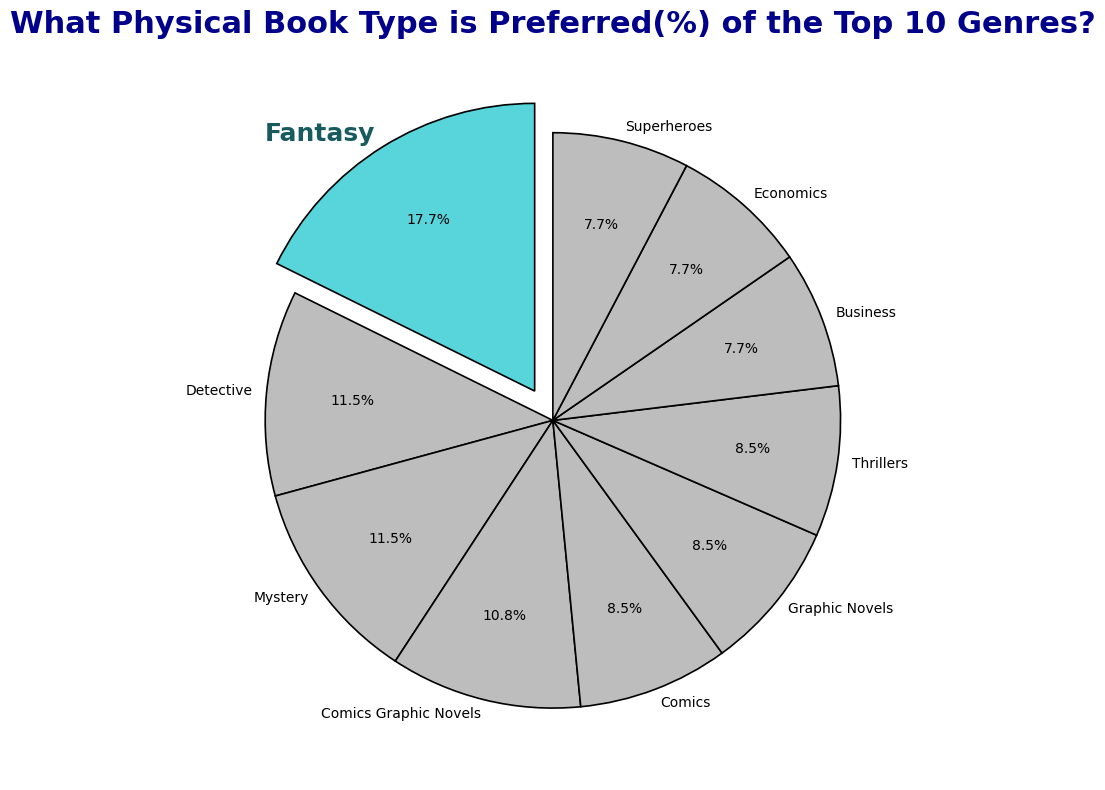

In [708]:
#Pie Graph of Question 3 : Calculated the percentage of the Top Ten books, then explode the top for visual distinction. 

top_idx = top10_physical_genres["pct_of_top10"].idxmax()
labels = top10_physical_genres["genre"].tolist()

colors = ["#58D5DB" if i == top_idx else "#BDBDBD" for i in top10_physical_genres.index]
explode = [0.12 if i == top_idx else 0 for i in top10_physical_genres.index]

plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    top10_physical_genres["pct_of_top10"],
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    explode=explode,
    labeldistance=1.05,
    pctdistance=0.7,
    wedgeprops={"edgecolor": "black", "linewidth": 1.2}
)

for i, t in enumerate(texts):
    if i == top_idx:
        t.set_fontweight("bold")
        t.set_color("#185B5E")
        t.set_fontsize(18)

plt.title(
    "What Physical Book Type is Preferred(%) of the Top 10 Genres?",
    pad=20,
    fontsize=22,
    weight="bold",
    color="darkblue"
)

plt.tight_layout()
plt.show()


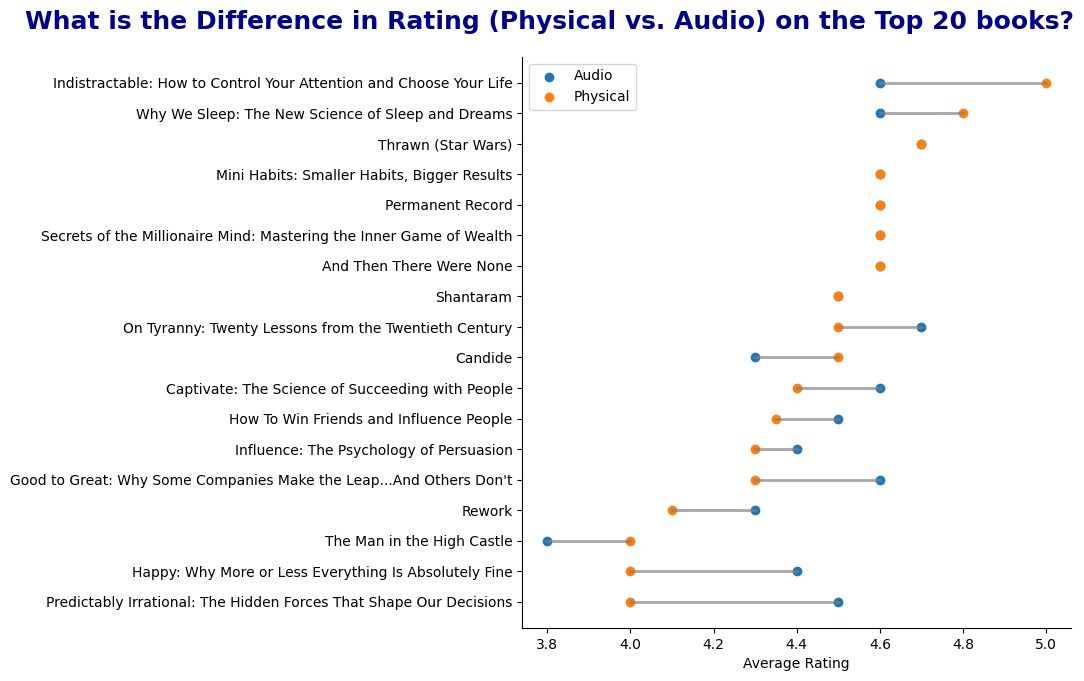

In [705]:
#Question 3: Dumbell Chart - 
Duplicate_title = pd.read_sql(query5, conn)

Duplicate_title["audio_rating"] = pd.to_numeric(Duplicate_title["audio_rating"], errors="coerce")
Duplicate_title["physical_rating"] = pd.to_numeric(Duplicate_title["physical_rating"], errors="coerce")


Duplicate_title["diff"] = (Duplicate_title["audio_rating"] - Duplicate_title["physical_rating"]).abs()
top20 = Duplicate_title.sort_values("diff", ascending=False).head(20).sort_values("physical_rating")

plt.figure(figsize=(12, 8))

for _, row in top20.iterrows():
    plt.plot(
        [row["audio_rating"], row["physical_rating"]],
        [row["title"], row["title"]],
        linewidth=2,
        color="grey",
        alpha=0.7
    )

plt.scatter(top20["audio_rating"], top20["title"], label="Audio")
plt.scatter(top20["physical_rating"], top20["title"], label="Physical")

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.title("What is the Difference in Rating (Physical vs. Audio) on the Top 20 books?", fontsize=18, weight="bold", color="darkblue", pad=20, x=0.05)
plt.xlabel("Average Rating")
plt.ylabel("")
plt.legend()
plt.tight_layout(pad= 5)
plt.show()



In [706]:
# Question 8 maybe?

In [707]:
# Question 4 potentially

## Data Restraints 

Price- audio
Columns
Not as many audio


